In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/rainfall in india 1901-2015.csv")

In [ ]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[()]", "", regex=True)
    .str.replace("-", "_")
)

In [ ]:
df.dropna(axis=1, how="all", inplace=True)
df.dropna(axis=0, how="all", inplace=True)

In [ ]:
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-2425735299.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
df.to_csv("Rainfall_Cleaned.csv", index=False)

In [ ]:
print("\n=== Dataset Info ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())
print("\n=== Summary Statistics ===")
print(df.describe().T)


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Sl.No                                              33 non-null     object 
 1   District                                           33 non-null     object 
 2   South_West_MonsoonJune_14_to_September_14Actual    33 non-null     float64
 3   South_West_MonsoonJune_14_to_September_14Normal    33 non-null     float64
 4   North_East_MonsoonOctober_14_to_December_14Actual  33 non-null     float64
 5   North_East_MonsoonOctober_14_to_December_14Normal  33 non-null     float64
 6   Winter_SeasonJanuary_15_and_February_15_Actual     33 non-null     float64
 7   Winter_SeasonJanuary_15_and_February_15Normal      33 non-null     float64
 8   Hot_Weather_SeasonMarch_15_to_May_15Actual         33 non-null     flo

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")

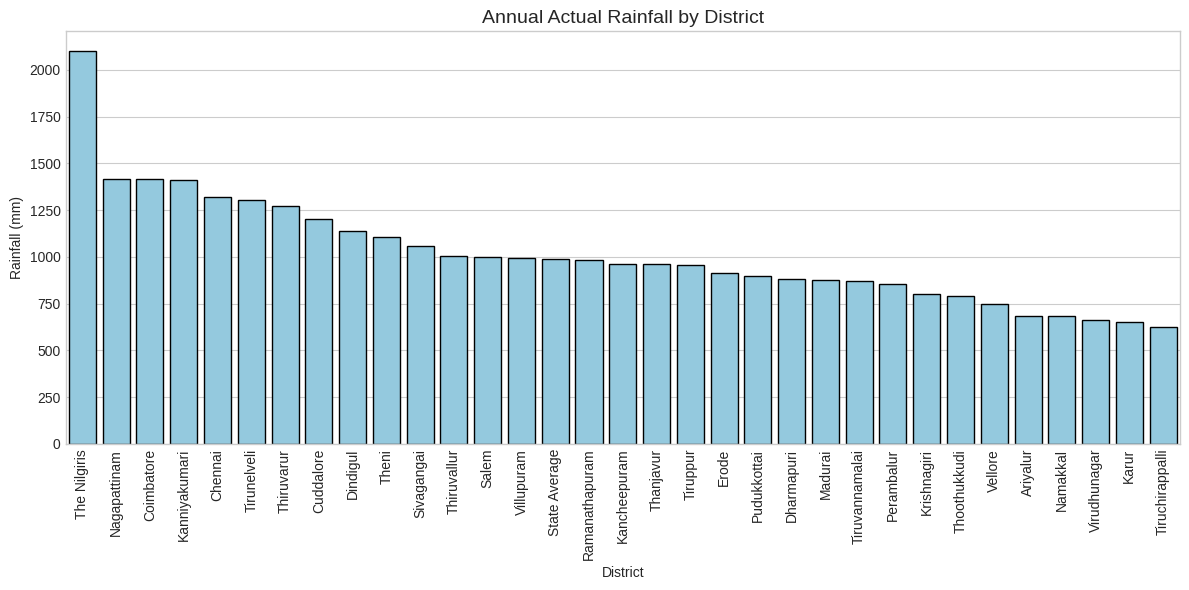

In [ ]:
annual_actual_col = [col for col in df.columns if "Annual" in col and "Actual" in col][0]
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values(annual_actual_col, ascending=False),
            x="District", y=annual_actual_col, color="skyblue", edgecolor="black")
plt.xticks(rotation=90)
plt.title("Annual Actual Rainfall by District", fontsize=14)
plt.ylabel("Rainfall (mm)")
plt.tight_layout()
plt.show()

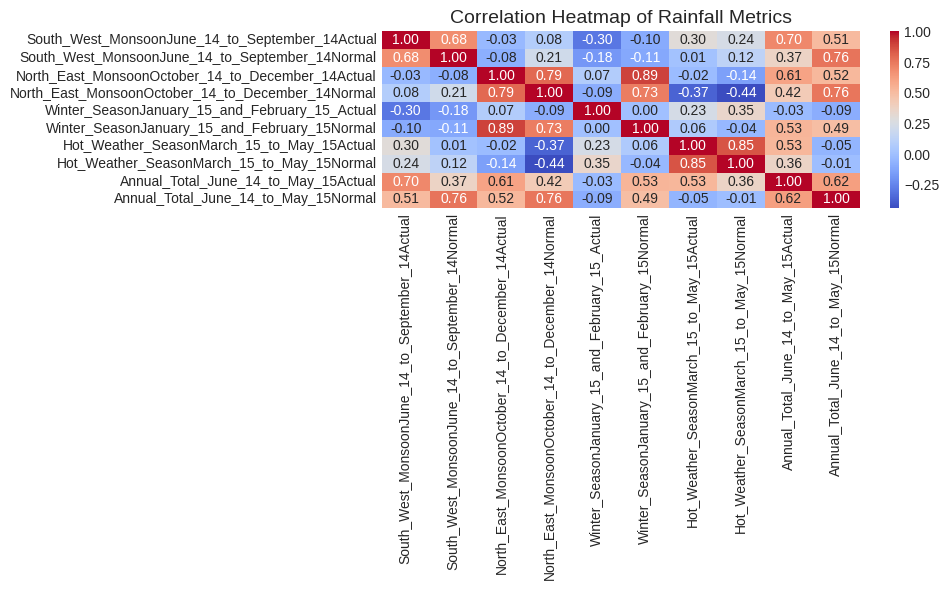

In [ ]:
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=["float64", "int64"])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Rainfall Metrics", fontsize=14)
plt.tight_layout()
plt.show()

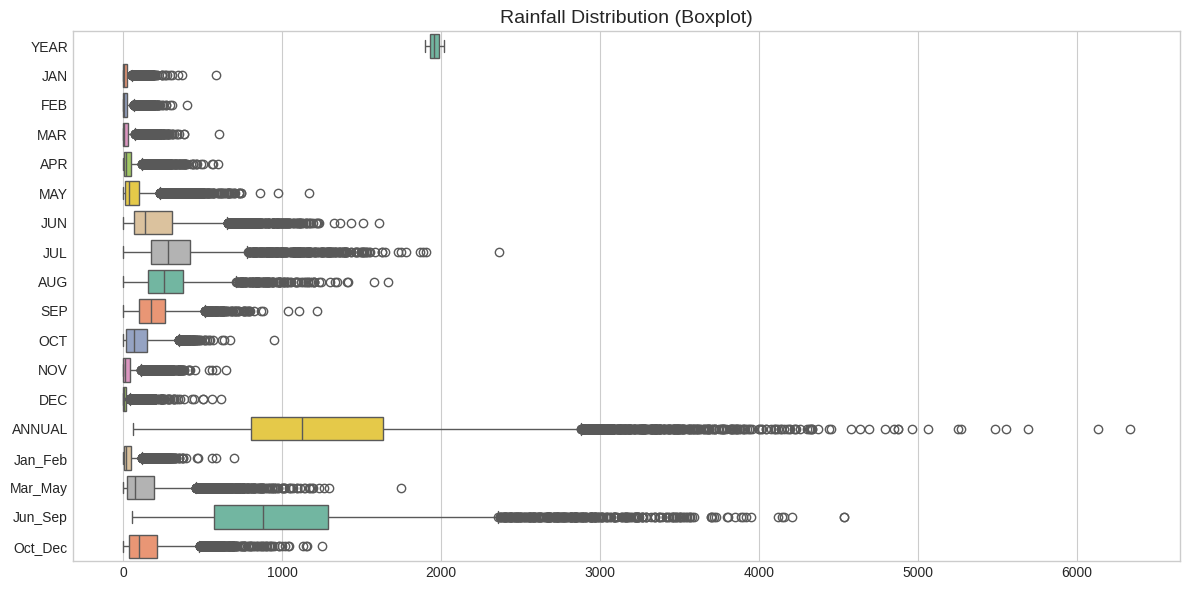

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols, orient="h", palette="Set2")
plt.title("Rainfall Distribution (Boxplot)", fontsize=14)
plt.tight_layout()
plt.show()

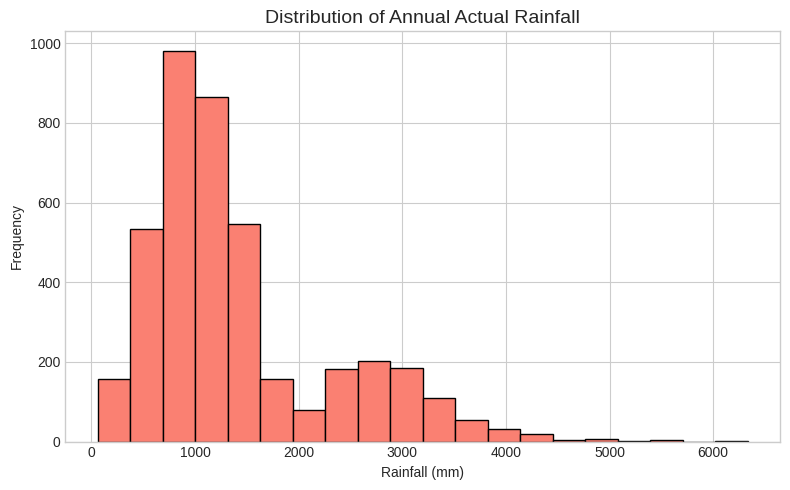

In [30]:
annual_actual_col = "ANNUAL"
plt.figure(figsize=(8, 5))
plt.hist(df[annual_actual_col], bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Annual Actual Rainfall", fontsize=14)
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [43]:
# Calculate mean, median, and mode for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

print("Mean:")
display(numeric_cols.mean())

print("\nMedian:")
display(numeric_cols.median())

print("\nMode:")
# Mode can return multiple values if there's a tie, so we'll display the first one
display(numeric_cols.mode().iloc[0])

Mean:


,0
YEAR,1958.218659
JAN,18.957320
FEB,21.805325
MAR,27.359197
APR,43.127432
MAY,85.745417
JUN,230.234444
JUL,347.214334
AUG,290.263497
SEP,197.361922



Median:


,0
YEAR,1958.00
JAN,6.00
FEB,6.70
MAR,7.90
APR,15.70
MAY,36.70
JUN,138.90
JUL,284.90
AUG,259.50
SEP,174.10



Mode:


,0
YEAR,1916.000000
JAN,0.000000
FEB,0.000000
MAR,0.000000
APR,0.000000
MAY,0.000000
JUN,48.600000
JUL,347.214334
AUG,226.700000
SEP,160.800000


In [31]:
df.to_csv("Rainfall_Cleaned_Wide.csv", index=False)

print("✅ Cleaning complete. File saved as Rainfall_Cleaned_Wide.csv")

✅ Cleaning complete. File saved as Rainfall_Cleaned_Wide.csv


In [32]:
df_clean = df.copy()

In [33]:
print(df_clean.head())

                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan_Feb  Mar_May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun_Sep  Oct_Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   

In [34]:
from google.colab import files
files.download("Rainfall_Cleaned_Wide.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
X = df.drop(columns=["SUBDIVISION", "YEAR"])
y = df["ANNUAL"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [40]:
print("R² score (train):", mlr.score(X_train, y_train))
print("R² score (test):", mlr.score(X_test, y_test))

R² score (train): 1.0
R² score (test): 1.0


In [41]:
X_be = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X_be).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ANNUAL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.064e+30
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:43:12   Log-Likelihood:             1.0074e+05
No. Observations:                4116   AIC:                        -2.014e+05
Df Residuals:                    4098   BIC:                        -2.013e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.956e-13   2.01e-13     -2.469      0.0

In [42]:
def backward_elimination(X, y, sl=0.05):
    X = sm.add_constant(X)
    while True:
        model = sm.OLS(y, X).fit()
        max_p = model.pvalues.max()
        if max_p > sl:
            feature_to_remove = model.pvalues.idxmax()
            print(f"Removing: {feature_to_remove} (p={max_p:.4f})")
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    return X, model

X_opt, final_model = backward_elimination(X, y)
print(final_model.summary())

Removing: NOV (p=0.9969)
Removing: APR (p=0.7628)
Removing: Mar_May (p=0.7223)
Removing: Jun_Sep (p=0.9413)
Removing: FEB (p=0.9490)
Removing: JAN (p=0.7597)
                            OLS Regression Results                            
Dep. Variable:                 ANNUAL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.428e+32
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:43:15   Log-Likelihood:             1.0743e+05
No. Observations:                4116   AIC:                        -2.148e+05
Df Residuals:                    4104   BIC:                        -2.148e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|